# Experiment - 6 (Decision Trees)
Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of Decision Trees for Classification

Aim: To implement and understand the Decision Trees algorithm for classification tasks and evaluate its performance on a given dataset.
---

## Salary Prediction

### Importing Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import userdata
root = userdata.get('sml_ds')

In [ ]:
data = pd.read_csv(f"{root}dt_ds1.csv")
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


### Exploring Dataset

In [ ]:
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
display(data.describe())

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [ ]:
print(f'Columns = {data.columns} \nShape: {data.shape}')

Columns = Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object') 
Shape: (16, 4)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


### Preprocessing

In [ ]:
X = data.drop('salary_more_then_100k',axis="columns")
y = data['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cX = pd.DataFrame()

cX['company'] = encoder.fit_transform(X['company'])
cX['job'] = encoder.fit_transform(X['job'])
cX['degree'] = encoder.fit_transform(X['degree'])

Encoding:

| company    | e_c | job                 | j_e | degree    | d_e |
|------------|-----|---------------------|-----|-----------|-----|
| Google     | 2   | sales executive     | 2   | Bachelors | 0   |
| ABC Pharma | 0   | business manager    | 0   | Masters   | 1   |
| Facebook   | 1   | computer programmer | 1   |           |     |


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(cX,y)

DecisionTreeClassifier()

In [ ]:
print(model.predict([[2,0,0]])) # Business manager at google with bachelors degree

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Iphone Buyers

In [ ]:
import pandas as pd
df = pd.read_csv(f"{root}/Datasets/dt_ds2.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
X = df.drop('Purchase Iphone',axis="columns")
y = df['Purchase Iphone']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

eX = pd.DataFrame()

eX['Gender'] = encoder.fit_transform(X['Gender'])
eX['Age'] = X['Age']
eX['Salary'] = X['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
eX_train, eX_test, y_train, y_test = train_test_split(eX,y,test_size=0.2, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(eX_train, y_train)

y_pred = model1.predict(eX_test)
print(accuracy_score(y_test,y_pred))

0.8125


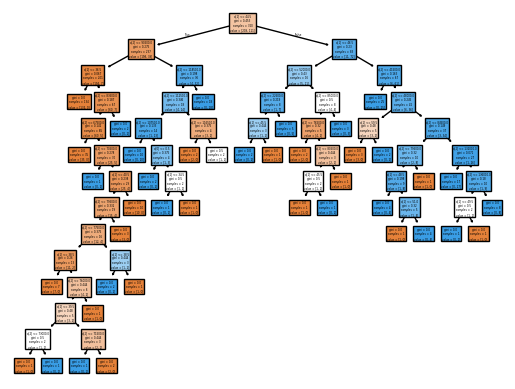

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure()
tree.plot_tree(model1, filled=True)
plt.show()
plt.savefig('decision_tree.svg', format='svg')
